In [2]:
import torch

# Vector


In [ ]:
# create a torch tensor by torch.tensor()
x = torch.tensor([1, 2, 3]) 
print("Type of x: {}".format(type(x)))

Type of x: <class 'torch.Tensor'>


In [ ]:
# get the last element of x
x[x.shape[0] - 1] # using x.shape[0] - 1 to access the index of the last element

tensor(3)

In [ ]:
x[-1] # negative indexing comes to rescue

tensor(3)

# Matrix

In [2]:
A = torch.tensor([[1, 2], [3, 4], [5, 6]])
print("Shape of matrix A: {}".format(A.shape))
print("Number of rows of matrix A: {}".format(A[0].shape))
# or we can get just the number by indexing torch.Size()
print("Number of columns of matrix A: {}".format(A.shape[1]))

Shape of matrix A: torch.Size([3, 2])
Number of rows of matrix A: torch.Size([2])
Number of columns of matrix A: 2


In [ ]:
print(type(A.shape))

<class 'torch.Size'>


In [ ]:
print(A)
print(A[:, 1])

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([2, 4, 6])


# Torch storage

In [3]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x[1][2] == x.storage()[5])

tensor(True)


In [6]:
x_t = x.t()
# id(x) function return address of x
print("ID x equals to x transpose: {}".format(id(x) == id(x_t)))
print("ID x storage equals to x transpose: {}".format(id(x.storage()) == id(x_t.storage())))

ID x equals to x transpose: False
ID x storage equals to x transpose: True


In [10]:
# use data_ptr() to get the stable memory address exported from c++ part
print("Address x equals to x transpose: {}".format(x.data_ptr() == x_t.data_ptr()))
print("Address x storage equals to x transpose: {}".format(x.storage().data_ptr() == x_t.storage().data_ptr()))

Address x equals to x transpose: True
Address x storage equals to x transpose: True


# Contiguos Tensor

In [ ]:
# x.is_contiguous() return if the storage of x is contiguos or not
print("Storage of x is contiguous: {}".format(x.is_contiguous()))
print("Storage of x transpose is contiguous: {}".format(x_t.is_contiguous()))

Storage of x is contiguous: True
Storage of x transpose is contiguous: False


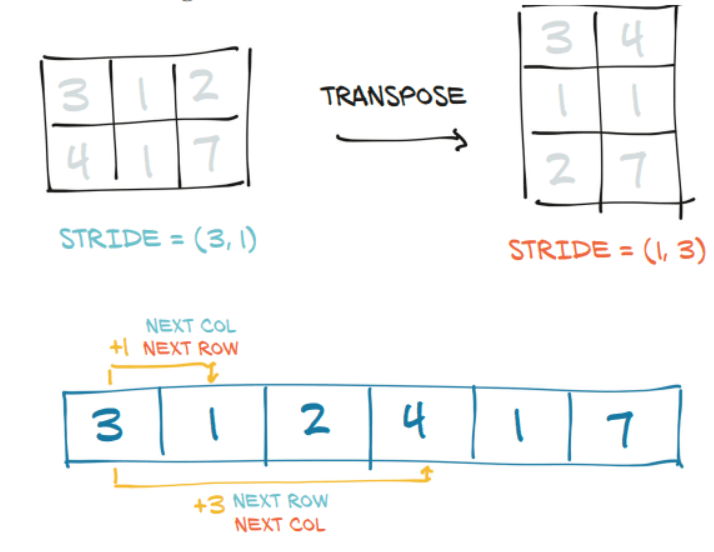

In [ ]:
# get the stride of x by x.stride()
print("Stride of x: {}".format(x.stride()))
print("Stride of x transpose: {}".format(x_t.stride()))

Stride of x: (3, 1)
Stride of x transpose: (1, 3)


In [ ]:
# x.contiguous() convert the storage of x to contiguos storage
x_t_con = x_t.contiguous() # remember to re-allocate x_t
print("Storage of x transpose is contiguous: {}".format(x_t_con.is_contiguous()))
print("Stride of x transpose: {}".format(x_t_con.stride()))

Storage of x transpose is contiguous: True
Stride of x transpose: (2, 1)


# Torch GPU

In [ ]:
# initialize torch tensor on gpu
x_gpu = torch.tensor([[4, 1], [5, 3], [2, 1]], device='cuda')

In [ ]:
# or using x.to(device='cuda')
x = torch.tensor([[4, 1], [5, 3], [2, 1]])
x_gpu = x.to(device='cuda')

# Torch Tensor to Numpy Array

In [11]:
x = torch.tensor([1,2,3])
x_np = x.numpy()

If tensor is saved in CPU, Torch tensor and Numpy array share the same memory



In [12]:
x[1] = 0
print(x) # output: [1, 0, 3]
print(x_np) # output: [1, 0, 3]

tensor([1, 0, 3])
[1 0 3]


If tensor is saved in GPU, we can not directly transfer data from torch tensor to numpy. We have copy that data to the CPU before.



In [18]:
x_gpu = x.to(device="cuda")
x_cpu = x_gpu.cpu()
x_np = x_cpu.numpy()
x_gpu[1] = 9
print(x_gpu)
print(x_np)

tensor([1, 9, 3], device='cuda:0')
[1 0 3]


In [20]:
id(x_gpu.storage) == id(x_cpu.storage)

True